In [195]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [196]:
data = pd.read_csv("copper-new.txt", delim_whitespace=True, header=None, na_filter=False) 

In [197]:
data.head()

,0,1
0,0.591,24.41
1,4.703,54.98
2,9.470,89.57
3,11.615,114.26
4,12.970,133.61


In [198]:
X = data[data.columns[1]]
y = data[data.columns[0]]

In [199]:
X = np.array(X).reshape((-1, 1))
y = np.array(y).reshape((-1, 1))

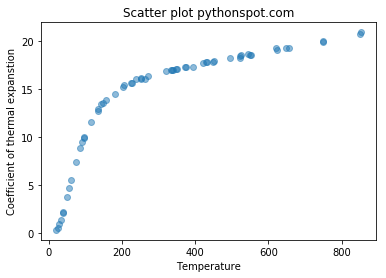

In [200]:
# Plot
plt.scatter(X, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Temperature')
plt.ylabel('Coefficient of thermal expanstion')
plt.show()

In [201]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(model)

#To retrieve the intercept:
print("The intercept", model.intercept_)

#For retrieving the slope:
print("The slope", model.coef_)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("The root mean square error", rmse)
print("The r2", r2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The intercept [7.38412739]
The slope [[0.02128314]]
The root mean square error 3.243561781943323
The r2 0.6861858695095129


In [203]:
#My strategy is to first evaluate the Ridge regression model iwth only lamda = 0. Which makes my regeresion only typical 
#regression model. I will test various polynomial of the data. 
#I will pick the best fit data (least RMSE)
#The expectation is to witness the RMSE goes down by increasing the polynomal degree and then at some point
#the fit get worsen. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42, shuffle=True)

bestRMSE = 1000
bestAlpha = -1
bestDegree = 100

for i in range(2, 11):
    polynomial_features= PolynomialFeatures(degree=i)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
        
    # create and fit a ridge regression model, testing each alpha
    model = Ridge(alpha=0)
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(rmse, alpha)
    if(bestRMSE > rmse):
        bestRMSE = rmse
        bestDegree = i

print("best polynomial degree", bestDegree)
print("best RMSE", bestRMSE)
    

2.331321624986699 100.01000000001426
1.2778948182659364 100.01000000001426
0.56667734685041 100.01000000001426
0.3225830042568235 100.01000000001426
0.8368888515403039 100.01000000001426
4.34431889297471 100.01000000001426
5.407304751118677 100.01000000001426
6.070466248049359 100.01000000001426
26.499969516203862 100.01000000001426
best polynomial degree 5
best RMSE 0.3225830042568235


In [204]:
model

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [180]:
polynomial_features= PolynomialFeatures(degree=bestDegree)
X_poly = polynomial_features.fit_transform(X)

all_rmse = []
all_alpha = []
alpha = .01
for i in range(10000):
    model = Ridge(alpha=alpha)
    
    kf = KFold(n_splits=5)
    #print(kf.get_n_splits(X))
    #print(kf)
    temp = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        model.fit(X_poly[train_index], y[train_index])
        y_pred = model.predict(X_poly[test_index])
        rmse = np.sqrt(mean_squared_error(y[test_index],y_pred))
        temp.append(rmse)
        
    all_alpha.append(alpha)
    all_rmse.append(np.average(temp))
    alpha = alpha + .01
    
#print(all_alpha)
print(np.argmin(all_rmse))
print(all_rmse[np.argmin(all_rmse)])
print(all_alpha[np.argmin(all_rmse)])


3902
0.29896202357045726
39.030000000000804


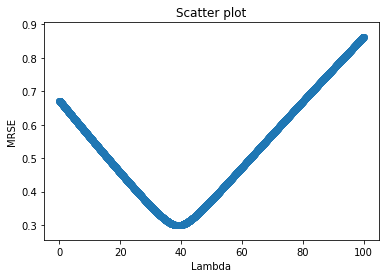

In [181]:
# Plot
plt.scatter(all_alpha, all_rmse, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Lambda')
plt.ylabel('MRSE')
plt.show()

In [187]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict([[400]])
print(y_pred)

[[15.89738509]]


In [194]:
polynomial_features= PolynomialFeatures(degree=bestDegree)
X_poly = polynomial_features.fit_transform(X)

model = Ridge(alpha=39.03)
model.fit(X_poly, y)
y_pred = model.predict(polynomial_features.fit_transform([[400]]))
print(y_pred)

[[17.42891061]]
